In [1]:
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
with open('checkpoint_fold_0-9_item_based.pkl', 'rb') as f:
    d = pickle.load(f)

In [3]:
df = pd.DataFrame(d)
# df[df["metric_name"]=="adjusted cosine"]
df_CV = df\
    .groupby(
        [
            "metric_name",
            "n_neighbors"
        ]
    )\
    .agg(
        {
            "rmse": lambda x: np.linalg.norm(x, 2) / np.sqrt(len(x)),
            "mae": "mean"
        }
    )
metric_names = sorted(list(set(x[0] for x in df_CV.index)))
rmse_CV = df_CV.loc[:, "rmse"].unstack(0)
mae_CV = df_CV.loc[:, "mae"].unstack(0)

In [4]:
rmse_CV

metric_name,adjusted cosine,cosine,deduct 2.5,deduct 2.75,deduct 2.9,deduct 3,"remap 1,5->-+1, 24->-+0.5, 3->0.25","remap 12->-1, 345->1"
n_neighbors,,,,,,,,
1,1.024989,1.037689,1.030829,1.029329,1.028106,1.027441,1.029023,1.032486
2,1.012269,1.027754,1.020654,1.017925,1.016564,1.015490,1.016944,1.019886
3,1.004723,1.020225,1.012056,1.009637,1.007856,1.006772,1.008597,1.011139
4,0.998957,1.013157,1.004937,1.002717,1.001184,1.000051,1.002282,1.003759
5,0.992810,1.006991,0.998631,0.996246,0.994730,0.993890,0.995539,0.997449
...,...,...,...,...,...,...,...,...
196,0.889682,0.934637,0.918592,0.912902,0.908245,0.904622,0.911306,0.920965
197,0.889599,0.934652,0.918576,0.912901,0.908245,0.904609,0.911307,0.920981
198,0.889537,0.934659,0.918571,0.912904,0.908230,0.904576,0.911311,0.920987


In [5]:
mae_CV

metric_name,adjusted cosine,cosine,deduct 2.5,deduct 2.75,deduct 2.9,deduct 3,"remap 1,5->-+1, 24->-+0.5, 3->0.25","remap 12->-1, 345->1"
n_neighbors,,,,,,,,
1,0.786086,0.792377,0.787771,0.786730,0.785897,0.785518,0.786676,0.789110
2,0.771416,0.779720,0.774670,0.772730,0.771763,0.770972,0.772109,0.774146
3,0.763932,0.772864,0.766799,0.764907,0.763715,0.762874,0.764323,0.766007
4,0.758888,0.767884,0.761112,0.759534,0.758232,0.757348,0.759328,0.760285
5,0.754504,0.764063,0.756917,0.755010,0.753695,0.752941,0.754538,0.756203
...,...,...,...,...,...,...,...,...
196,0.701935,0.742047,0.727139,0.721910,0.717697,0.714489,0.720765,0.729046
197,0.701899,0.742081,0.727153,0.721934,0.717725,0.714503,0.720793,0.729087
198,0.701882,0.742111,0.727173,0.721966,0.717745,0.714501,0.720822,0.729123


The MAE are still decreasing for each metric even setting n_neighbors to 200, but the curve is flattened out (see below).

The best metric with best MAE, RMSE seems to be the `adjusted cosine`. `deduct 3` has the best next performance in these two metrics. 

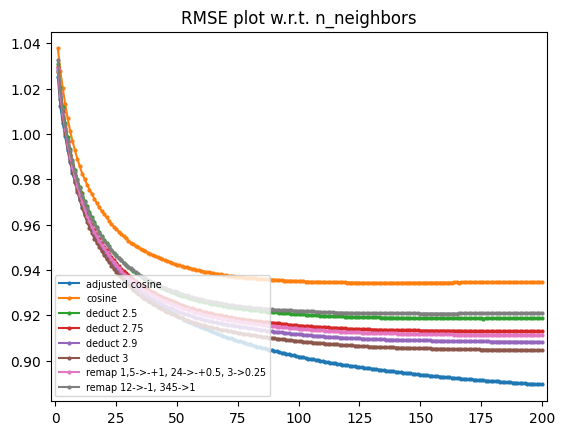

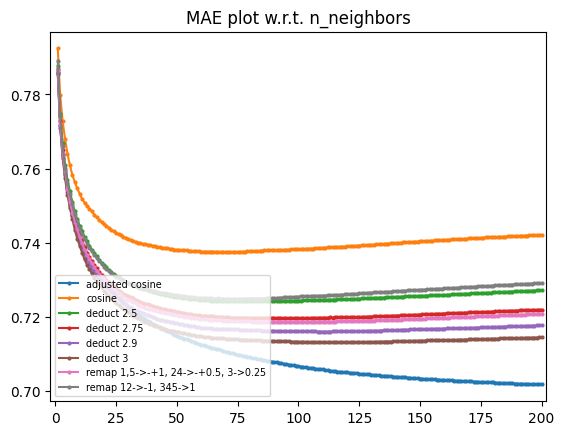

In [6]:
ax = plt.gca()
ax.set_title("RMSE plot w.r.t. n_neighbors")
for metric_name in rmse_CV.columns:
    ax.plot(
        rmse_CV[metric_name],
        marker='.',
        markersize=4,
        label=metric_name
    )
ax.legend(loc="lower left", fontsize="x-small")
ax.set_xlim([-2, 202])
plt.show()
ax = plt.gca()
ax.set_title("MAE plot w.r.t. n_neighbors")
for metric_name in mae_CV.columns:
    ax.plot(
        mae_CV[metric_name],
        marker='.',
        markersize=4,
        label=metric_name
    )
ax.legend(loc="lower left", fontsize="x-small")
ax.set_xlim([-2, 202])
plt.show()

In [7]:
CV_mins = pd.concat(
    [
        rmse_CV.apply(func=np.argmin, axis=0) + 1,
        rmse_CV.apply(func=np.min, axis=0),
        mae_CV.apply(func=np.argmin, axis=0) + 1,
        mae_CV.apply(func=np.min, axis=0)
    ],
    axis=1
)
CV_mins.columns = ["rmse argmin", "rmse min", "mae argmin", "mae min"]
CV_mins

,rmse argmin,rmse min,mae argmin,mae min
metric_name,,,,
adjusted cosine,200,0.889419,200,0.701847
cosine,135,0.934262,72,0.737544
deduct 2.5,176,0.918529,80,0.724225
deduct 2.75,200,0.912893,96,0.719689
deduct 2.9,200,0.908217,111,0.716099
deduct 3,200,0.904548,119,0.713258
"remap 1,5->-+1, 24->-+0.5, 3->0.25",195,0.911303,105,0.718678
"remap 12->-1, 345->1",162,0.920695,72,0.724908
